# Phase 1 - Get the Data

Scraping data and save it to csv files.

In [1]:
# import library
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

In [ ]:
# fungsi scrape data rumah
def scrape_city(city, url, page=1):
  print(f"scrape halaman {page} untuk kota {city}")

  headers = {
      "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
  }

  response = requests.get(url +f"?page={page}", headers=headers)
  # check response
  print(response.status_code)

  # import ke beautifulsoup
  soup = BeautifulSoup(response.text, "html.parser")

  # get container utama
  container = soup.find("div", {"class": "card-list-section"})

  # get elemen informasi rumah
  featured = container.find_all('div', {'class': 'featured-card-component'})

  print(f'Jumlah rumah yang ditemukan: {len(featured)}')


  # menampung data
  data = []

  # loop untuk setiap rumah
  for idx, house in enumerate(featured):
    print(f'Scraping rumah ke-{idx + 1}')

    # container untuk rumah
    content = house.find('div', {'class': 'card-featured__middle-section'})

    if content is None:
      continue

    # ambil data harga
    price = content.find('div', {'class': 'card-featured__middle-section__price'}).text.strip()
    # print(price)

    # ambil judul
    title = content.contents[2].text.strip()  if len(content.contents) > 2 else ""

    # ambil lokasi rumah, sub-elemen (anak) ke-4 dari content
    location = content.contents[3].text.strip()  if len(content.contents) > 3 else ""

    features = content.find('div', {'class': 'card-featured__middle-section__attribute'})
    attributes = features.find_all('span', {'class': 'attribute-text'})


    bedrooms = attributes[0].text.strip()  if len(attributes) > 0 else ""
    bathrooms = attributes[1].text.strip() if len(attributes) > 1 else ""
    garage = attributes[2].text.strip() if len(attributes) > 2 else ""

    area = features.contents[1].text.strip()  if len(features.contents) > 1 else "" # anak ke-2
    building_area = features.contents[2].text.strip()  if len(features.contents) > 2 else "" # anak ke-3

    data.append({
            'city': city,
            'title': title,
            'price': price,
            'location': location,
            'area': area,
            'building_area': building_area,
            'bedrooms': bedrooms,
            'bathrooms': bathrooms,
            'garage': garage
    })

  return data

In [2]:
# fungsi menjalankan scraper

def start_scrape(cities, max_page_per_city = 10):
  data = []

  for city, url in cities.items():
    for page in range(1, max_page_per_city + 1):
      page_data = scrape_city(city, url, page)
      if(len(page_data)):
        data.extend(page_data)

      time.sleep(10)

  return data

In [ ]:
# memilih kota dan url lalu menjalankan scraper

cities_timur = {
    "makassar": "https://www.rumah123.com/jual/makassar/rumah/",
    "gowa": "https://www.rumah123.com/jual/gowa/rumah/",
    "maros": "https://www.rumah123.com/jual/maros/rumah/",
    "kendari": "https://www.rumah123.com/jual/kendari/rumah/",
    "palu": "https://www.rumah123.com/jual/palu/rumah/",
    "parepare": "https://www.rumah123.com/jual/pare-pare/rumah/",
    "palopo": "https://www.rumah123.com/jual/palopo/rumah/",
    "bulukumba": "https://www.rumah123.com/jual/bulukumba/rumah/",
    "takalar": "https://www.rumah123.com/jual/takalar/rumah/"
    "ambon": "https://www.rumah123.com/jual/ambon/rumah/",
    "ntt": "https://www.rumah123.com/jual/manggarai-barat/apartemen/",
    "bali_gianyar": "https://www.rumah123.com/jual/gianyar/rumah/",
    "bali_denpasar": "https://www.rumah123.com/jual/denpasar/rumah/",
    "bali_canggu": "https://www.rumah123.com/jual/badung/canggu/rumah/"
}

cities_jatim = {
    "surabaya": "https://www.rumah123.com/jual/surabaya/rumah/",
    "malang": "https://www.rumah123.com/jual/malang/rumah/",
    "sidoarjo": "https://www.rumah123.com/jual/sidoarjo/rumah/"

}

cities_jkt = {
    "Jakarta Barat": "https://www.rumah123.com/jual/jakarta-barat/rumah/",
    "Jakarta Timur": "https://www.rumah123.com/jual/jakarta-timur/rumah/",
    "Jakarta Selatan": "https://www.rumah123.com/jual/jakarta-selatan/rumah/",
    "Jakarta Pusat": "https://www.rumah123.com/jual/jakarta-pusat/rumah/",
    "Jakarta Utara": "https://www.rumah123.com/jual/jakarta-utara/rumah/",
    "Bogor": "https://www.rumah123.com/jual/bogor/rumah/",
    "Depok": "https://www.rumah123.com/jual/depok/rumah/",
    "Tangerang": "https://www.rumah123.com/jual/tangerang/rumah/",
    "Tangerang Selatan": "https://www.rumah123.com/jual/tangerang-selatan/rumah/",
    "Bekasi": "https://www.rumah123.com/jual/bekasi/rumah/",
}

# sesuaikan nama kelompok kota yang ingin di-scrape
data_one = start_scrape(cities_jkt)
data_two = start_scrape(cities_jatim)
data_three = start_scrape(cities_timur)

# simpan ke dalam csv
df = pd.DataFrame(data_one)
df.to_csv("rumah_area_one.csv", index=False)

# df = pd.DataFrame(data_two)
# df.to_csv("rumah_area_two.csv", index=False)

# df = pd.DataFrame(data_three)
# df.to_csv("rumah_area_three.csv", index=False)

# Phase 2 - Data Cleaning

In [2]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
# read the data
df_one = pd.read_csv('data/raw/rumah_area_one.csv')
df_two = pd.read_csv('data/raw/rumah_area_two.csv')
df_three = pd.read_csv('data/raw/rumah_area_three.csv')

In [4]:
# join the dataframe
df = pd.concat([df_one, df_two, df_three], ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           2719 non-null   object 
 1   title          2719 non-null   object 
 2   price          2719 non-null   object 
 3   location       2719 non-null   object 
 4   area           2719 non-null   object 
 5   building_area  2678 non-null   object 
 6   bedrooms       2681 non-null   float64
 7   bathrooms      2657 non-null   float64
 8   garage         1839 non-null   float64
dtypes: float64(3), object(6)
memory usage: 191.3+ KB


In [6]:
df.head(5)

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
0,Jakarta Selatan,Dijual Rumah Sultan Mewah Full Furnish Di Kema...,Rp 45 Miliar,"Kemang, Jakarta Selatan",: 730 m²,: 1100 m²,7.0,8.0,10.0
1,Jakarta Selatan,Rumah Mewah S Pool Cilandak Jakarta Selatan,"Rp 69,9 Miliar","Cilandak, Jakarta Selatan",: 4500 m²,: 2500 m²,12.0,8.0,5.0
2,Jakarta Selatan,"Rumah Mewah 3 Lantai Ada Roof Top, Dalam Kompl...","Rp 7,91 Miliar","Pondok Indah, Jakarta Selatan",: 128 m²,: 302 m²,3.0,3.0,2.0
3,Jakarta Selatan,Rumah 1 Lantai Di Cipete Kebayoran Baru Lokasi...,"Rp 14,5 Miliar","Cipete, Jakarta Selatan",: 518 m²,: 450 m²,5.0,6.0,5.0
4,Jakarta Selatan,Rumah Bagus Rapih Siap Huni di Sektor 6 Bintar...,Rp 3 Miliar,"Bintaro, Jakarta Selatan",: 120 m²,: 90 m²,4.0,2.0,NaN


In [7]:
df.tail(5)

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
2714,takalar,Rumah Sederhana Di Galesong Utara,Rp 260 Juta,"Galesong Utara, Takalar",: 72 m²,: 60 m²,2.0,1.0,1.0
2715,takalar,"Rachita Indah 2 Galesong, Rumah Subsidi Dekat ...",Rp 173 Juta,"Galesong Utara, Takalar",: 72 m²,: 30 m²,2.0,1.0,1.0
2716,takalar,"Rumah Murah di Daerah Polobangkeng Selatan, Ta...","Rp 99,5 Juta","Polobangkeng Selatan, Takalar",: 90 m²,: 399 m²,2.0,1.0,NaN
2717,takalar,"Rumah Murah di Daerah Mangara Bombang, Takalar",Rp 99 Juta,"Mangara Bombang, Takalar",: 36 m²,: 953 m²,2.0,2.0,NaN
2718,takalar,Rumah Baru Siap Huni Lokasi Strategis Jln Poro...,Rp 400 Juta,"Galesong Utara, Takalar",: 84 m²,: 60 m²,2.0,2.0,1.0


## Descriptive Statistics

In [8]:
df.describe()

,bedrooms,bathrooms,garage
count,2681.000000,2657.000000,1839.000000
mean,3.518090,2.794505,1.747145
std,2.264701,2.249146,1.207391
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,3.000000,2.000000
max,50.000000,50.000000,15.000000


## Check Missing Value

In [9]:
df.isnull().sum()

city               0
title              0
price              0
location           0
area               0
building_area     41
bedrooms          38
bathrooms         62
garage           880
dtype: int64

In [10]:
df[df['building_area'].isnull()]

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
26,Jakarta Selatan,Dijual Cepat Rmh Kost Putri Terbaik,"Rp 8,5 Miliar","Mampang Prapatan, Jakarta Selatan",: 385 m²,NaN,NaN,NaN,NaN
45,Jakarta Selatan,Rumah Akses Jalan 2 Mobil - Hanya Hitung Harga...,"Rp 5,5 Miliar","Tebet, Jakarta Selatan",: 120 m²,NaN,NaN,NaN,NaN
97,Jakarta Selatan,Jual Rumah Hitung Tanah Prime Area Pondok Indah,"Rp 18,5 Miliar","Pondok Indah, Jakarta Selatan",: 200 m²,NaN,NaN,NaN,NaN
132,Jakarta Selatan,Jual Rumah Hitung Tanah Prime Area Pondok Indah,"Rp 18,5 Miliar","Pondok Indah, Jakarta Selatan",: 200 m²,NaN,NaN,NaN,NaN
305,Jakarta Timur,Rumah Siap Huni Kavling Dki Pondok Kelapa,"Rp 1,65 Miliar","Pondok Kelapa, Jakarta Timur",: 89 m²,NaN,5.0,4.0,NaN
690,Jakarta Pusat,Rumah Salemba Raya 1 820 M2 32X25 Bisa Dibangu...,"Rp 24,9 Miliar","Salemba, Jakarta Pusat",: 620 m²,NaN,NaN,NaN,NaN
702,Jakarta Pusat,Rumah Tua Hitung Tanah Komersial Di Teuku Cik ...,Rp 75 Miliar,"Menteng, Jakarta Pusat",: 800 m²,NaN,NaN,NaN,NaN
703,Jakarta Pusat,"Cepat Rumah Pinggir Jalan 2,5 Lt Di Kramat Sen...",Rp 11 Miliar,"Senen, Jakarta Pusat",: 446 m²,NaN,4.0,2.0,2.0
712,Jakarta Pusat,Dijual Menteng Komersial Area Jalan Lebar Jara...,Rp 55 Miliar,"Menteng, Jakarta Pusat",: 650 m²,NaN,NaN,NaN,NaN
731,Jakarta Pusat,"Rumah Lama Di Taman Amir Hamzah, Proklamasi",Rp 49 Miliar,"Menteng, Jakarta Pusat",: 500 m²,NaN,NaN,NaN,NaN


In [11]:
df_no_missing = df.copy()

In [12]:
df_no_missing = df_no_missing.dropna(subset=['building_area','bedrooms','bathrooms'])

In [13]:
# missing value for garage
df_no_missing['garage'] = df_no_missing['garage'].fillna('0')

In [14]:
df_no_missing.isnull().sum()

city             0
title            0
price            0
location         0
area             0
building_area    0
bedrooms         0
bathrooms        0
garage           0
dtype: int64

## Duplicate Value

In [15]:
duplicate = df_no_missing.duplicated()

In [16]:
df_no_missing[duplicate].sort_values(by='city')

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
1966,Bekasi,Rumah 3 Lt SHM Bebas Banjir 15 menit ke Rumah ...,Rp 1 Miliar,"Jati Asih, Bekasi",: 89 m²,: 160 m²,4.0,2.0,0
1965,Bekasi,Rumah Murah Bebas Banjir dekat Kota Cinema Mal...,Rp 560 Juta,"Jati Asih, Bekasi",: 72 m²,: 72 m²,3.0,2.0,0
1043,Bogor,"Rumah Posisi Hook' Murah, Sertifikat View Gunu...","Rp 1,95 Miliar","Sentul City, Bogor",: 350 m²,: 70 m²,2.0,1.0,1.0
1039,Bogor,Rumah Minimalis Modern Siap Huni Kota Wisata,"Rp 1,15 Miliar","Kota Wisata, Bogor",: 90 m²,: 75 m²,2.0,2.0,1.0
1040,Bogor,Rumah Modern 2 Lantai Siap Huni Lokasi Strateg...,"Rp 1,65 Miliar","Kota Wisata, Bogor",: 84 m²,: 92 m²,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
2404,sidoarjo,Dijual Rumah Perum Safira Garden Cluster Sidoarjo,Rp 900 Juta,"Sidoarjo, Sidoarjo",: 90 m²,: 42 m²,2.0,1.0,1.0
2405,sidoarjo,"Dijual Rumah 2 Lantai Permata Sukodono, Sidoarjo","Rp 1,15 Miliar","Sidoarjo, Sidoarjo",: 127 m²,: 184 m²,4.0,4.0,1.0
2406,sidoarjo,Dijual Via Lelang Rumah Citra Harmoni Cluster ...,Rp 800 Juta,"Sidoarjo, Sidoarjo",: 120 m²,: 69 m²,2.0,1.0,2.0
2331,sidoarjo,FOR SALE RUMAH NEW GRESS TROPICAL HOUSE PONDOK...,"Rp 2,3 Miliar","Pondok Tjandra, Sidoarjo",: 200 m²,: 200 m²,3.0,2.0,2.0


In [17]:
df_no_missing[(df_no_missing['city']=='sidoarjo') & (df_no_missing.price == 'Rp 587 Juta') & (df_no_missing.bedrooms == 2)]

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
2335,sidoarjo,"Rumah Siap Huni Di Sidoarjo Kota, Bebas Banjir...",Rp 587 Juta,"Sidoarjo, Sidoarjo",: 72 m²,: 38 m²,2.0,1.0,2.0
2339,sidoarjo,"Rumah Siap Huni Di Sidoarjo Kota, Bebas Banjir...",Rp 587 Juta,"Sidoarjo, Sidoarjo",: 72 m²,: 38 m²,2.0,1.0,2.0


In [ ]:
# drop duplicate
df_no_duplicate = df_no_missing.drop_duplicates()

In [19]:
# check the last data
len(df_no_duplicate)

2470

In [20]:
# compare to the original data
len(df)

2719

## Handling inconsistent data

In [21]:
def check_unique_value(df, column):
    unique_values = df[column].unique()
    print(f"Unique values in column: {column}: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}")

In [53]:
print(check_unique_value(df_transformed, 'city'))

Unique values in column: city: ['Jakarta Selatan' 'Jakarta Timur' 'Jakarta Barat' 'Jakarta Pusat'
 'Jakarta Utara' 'Bogor' 'Depok' 'Tangerang' 'Tangerang Selatan' 'Bekasi'
 'surabaya' 'malang' 'sidoarjo' 'makassar' 'gowa' 'maros' 'parepare'
 'palopo' 'bulukumba' 'takalar']
Number of unique values: 20
None


In [22]:
print(check_unique_value(df_no_duplicate, 'price'))

Unique values in column: price: ['Rp 45 Miliar' 'Rp 69,9 Miliar' 'Rp 7,91 Miliar' 'Rp 14,5 Miliar'
 'Rp 3 Miliar' 'Rp 4,25 Miliar' 'Rp 875 Juta' 'Rp 16,9 Miliar'
 'Rp 21,5 Miliar' 'Rp 25 Miliar' 'Rp 14 Miliar' 'Rp 2,5 Miliar'
 'Rp 2,65 Miliar' 'Rp 12,5 Miliar' 'Rp 7,3 Miliar' 'Rp 1,42 Miliar'
 'Rp 68 Miliar' 'Rp 770 Juta' 'Rp 1,74 Miliar' 'Rp 8,45 Miliar'
 'Rp 6,87 Miliar' 'Rp 4,8 Miliar' 'Rp 7 Miliar' 'Rp 3,5 Miliar'
 'Rp 35 Miliar' 'Rp 10,6 Miliar' 'Rp 55 Miliar' 'Rp 13,4 Miliar'
 'Rp 18,9 Miliar' 'Rp 50 Miliar' 'Rp 7,5 Miliar' 'Rp 6 Miliar'
 'Rp 2,75 Miliar' 'Rp 4,2 Miliar' 'Rp 1,45 Miliar' 'Rp 31 Miliar'
 'Rp 12 Miliar' 'Rp 17,5 Miliar' 'Rp 998 Juta' 'Rp 24 Miliar'
 'Rp 3,45 Miliar' 'Rp 37 Miliar' 'Rp 39,9 Miliar' 'Rp 8,5 Miliar'
 'Rp 19,7 Miliar' 'Rp 9,5 Miliar' 'Rp 1,75 Miliar' 'Rp 39 Miliar'
 'Rp 170 Miliar' 'Rp 80 Miliar' 'Rp 41 Miliar' 'Rp 34 Miliar'
 'Rp 14,3 Miliar' 'Rp 1,8 Miliar' 'Rp 1,3 Miliar' 'Rp 16 Miliar'
 'Rp 2,48 Miliar' 'Rp 2,25 Miliar' 'Rp 13,5 Miliar' 'Rp 19,5 Mi

In [27]:
# function convert to millions
import re

def convert_price_to_millions(price):
    # Hapus semua spasi dan karakter tambahan
    price = re.sub(r'\s+', '', price)

    # ambil hanya bagian harga utama (sebelum bagian tambahan HEMAT dll)
    main_price = re.search(r'Rp\d+[,.]?\d*(Miliar|Juta)', price)

    # jika main price null
    if not main_price:
        return 0

    # extract main price
    main_price = main_price.group()
    # Hapus 'Rp' dan spasi
    main_price = main_price.replace('Rp', '').strip()
    # Ganti koma dengan titik untuk desimal
    main_price = main_price.replace(',', '.')

    try:
        # jika "Miliar", kalikan 1000
        if 'Miliar' in main_price:
            value = float(main_price.replace('Miliar', '').strip()) * 1000
        elif 'Juta' in main_price:
            value = float(main_price.replace('Juta', '').strip())
        else:
            value = 0
    except ValueError:
        value = 0

    return value

In [25]:
df_transformed = df_no_duplicate.copy()

In [28]:
# apply the conversion
df_transformed['price'] = df_transformed['price'].apply(lambda x: convert_price_to_millions(x))

In [29]:
df_transformed.head(5)

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
0,Jakarta Selatan,Dijual Rumah Sultan Mewah Full Furnish Di Kema...,45000.0,"Kemang, Jakarta Selatan",: 730 m²,: 1100 m²,7.0,8.0,10.0
1,Jakarta Selatan,Rumah Mewah S Pool Cilandak Jakarta Selatan,69900.0,"Cilandak, Jakarta Selatan",: 4500 m²,: 2500 m²,12.0,8.0,5.0
2,Jakarta Selatan,"Rumah Mewah 3 Lantai Ada Roof Top, Dalam Kompl...",7910.0,"Pondok Indah, Jakarta Selatan",: 128 m²,: 302 m²,3.0,3.0,2.0
3,Jakarta Selatan,Rumah 1 Lantai Di Cipete Kebayoran Baru Lokasi...,14500.0,"Cipete, Jakarta Selatan",: 518 m²,: 450 m²,5.0,6.0,5.0
4,Jakarta Selatan,Rumah Bagus Rapih Siap Huni di Sektor 6 Bintar...,3000.0,"Bintaro, Jakarta Selatan",: 120 m²,: 90 m²,4.0,2.0,0


In [32]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2470 entries, 0 to 2718
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           2470 non-null   object 
 1   title          2470 non-null   object 
 2   price          2470 non-null   float64
 3   location       2470 non-null   object 
 4   area           2470 non-null   object 
 5   building_area  2470 non-null   object 
 6   bedrooms       2470 non-null   float64
 7   bathrooms      2470 non-null   float64
 8   garage         2470 non-null   object 
dtypes: float64(3), object(6)
memory usage: 193.0+ KB


In [34]:
# convert garage to float64
df_transformed['garage'] = df_transformed['garage'].astype('float64')

In [36]:
df_transformed.describe()

,price,bedrooms,bathrooms,garage
count,2470.000000,2470.000000,2470.000000,2470.000000
mean,5653.223482,3.556680,2.819028,1.208097
std,14226.242762,2.312868,2.299568,1.290059
min,79.500000,1.000000,1.000000,0.000000
25%,910.000000,2.000000,2.000000,0.000000
50%,1950.000000,3.000000,3.000000,1.000000
75%,4307.500000,4.000000,3.000000,2.000000
max,294000.000000,50.000000,50.000000,15.000000


### Handling Area and Building Area Data

In [ ]:
# check 'area' data
print(check_unique_value(df_transformed, 'area'))

Unique values in column: area: [': 730 m²' ': 4500 m²' ': 128 m²' ': 518 m²' ': 120 m²' ': 127 m²'
 ': 38 m²' ': 208 m²' ': 1322 m²' ': 662 m²' ': 442 m²' ': 93 m²'
 ': 100 m²' ': 712 m²' ': 446 m²' ': 356 m²' ': 60 m²' ': 2950 m²'
 ': 30 m²' ': 105 m²' ': 250 m²' ': 433 m²' ': 187 m²' ': 150 m²'
 ': 325 m²' ': 236 m²' ': 317 m²' ': 1390 m²' ': 408 m²' ': 449 m²'
 ': 600 m²' ': 623 m²' ': 252 m²' ': 470 m²' ': 714 m²' ': 2363 m²'
 ': 345 m²' ': 290 m²' ': 109 m²' ': 180 m²' ': 525 m²' ': 160 m²'
 ': 300 m²' ': 32 m²' ': 454 m²' ': 426 m²' ': 140 m²' ': 342 m²'
 ': 441 m²' ': 1152 m²' ': 332 m²' ': 710 m²' ': 555 m²' ': 80 m²'
 ': 528 m²' ': 2835 m²' ': 700 m²' ': 1192 m²' ': 633 m²' ': 680 m²'
 ': 348 m²' ': 531 m²' ': 108 m²' ': 819 m²' ': 262 m²' ': 760 m²'
 ': 81 m²' ': 353 m²' ': 370 m²' ': 274 m²' ': 129 m²' ': 186 m²'
 ': 111 m²' ': 133 m²' ': 71 m²' ': 235 m²' ': 74 m²' ': 1190 m²'
 ': 580 m²' ': 244 m²' ': 318 m²' ': 400 m²' ': 264 m²' ': 72 m²'
 ': 530 m²' ': 247 m²' ': 141 m²

In [40]:
# check 'building_area' data
print(check_unique_value(df_transformed, 'building_area'))

Unique values in column: building_area: [': 1100 m²' ': 2500 m²' ': 302 m²' ': 450 m²' ': 90 m²' ': 280 m²'
 ': 80 m²' ': 500 m²' ': 380 m²' ': 160 m²' ': 120 m²' ': 750 m²'
 ': 50 m²' ': 125 m²' ': 250 m²' ': 361 m²' ': 180 m²' ': 400 m²'
 ': 235 m²' ': 240 m²' ': 1250 m²' ': 300 m²' ': 649 m²' ': 800 m²'
 ': 74 m²' ': 435 m²' ': 600 m²' ': 487 m²' ': 350 m²' ': 200 m²'
 ': 205 m²' ': 145 m²' ': 525 m²' ': 105 m²' ': 230 m²' ': 865 m²'
 ': 426 m²' ': 918 m²' ': 611 m²' ': 580 m²' ': 70 m²' ': 650 m²'
 ': 1400 m²' ': 802 m²' ': 840 m²' ': 703 m²' ': 466 m²' ': 700 m²'
 ': 1020 m²' ': 135 m²' ': 603 m²' ': 110 m²' ': 111 m²' ': 100 m²'
 ': 130 m²' ': 220 m²' ': 252 m²' ': 610 m²' ': 390 m²' ': 178 m²'
 ': 115 m²' ': 140 m²' ': 36 m²' ': 937 m²' ': 150 m²' ': 365 m²'
 ': 225 m²' ': 55 m²' ': 92 m²' ': 330 m²' ': 310 m²' ': 340 m²'
 ': 25000 m²' ': 564 m²' ': 409 m²' ': 550 m²' ': 325 m²' ': 440 m²'
 ': 1113 m²' ': 85 m²' ': 560 m²' ': 112 m²' ': 689 m²' ': 315 m²'
 ': 170 m²' ': 40 m²' '

In [43]:
# create function to clean area & building_area
import re

def clean_area(area):
    # delete 'm2' and ':'
    return float(re.sub(r'[:m²]', '', area).strip())

def transform_area(df, column):
    df[column] = df[column].apply(lambda x: clean_area(x))

In [44]:
# apply the function
transform_area(df_transformed, 'area')
transform_area(df_transformed, 'building_area')

In [45]:
# re-check
df_transformed.head()

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
0,Jakarta Selatan,Dijual Rumah Sultan Mewah Full Furnish Di Kema...,45000.0,"Kemang, Jakarta Selatan",730.0,1100.0,7.0,8.0,10.0
1,Jakarta Selatan,Rumah Mewah S Pool Cilandak Jakarta Selatan,69900.0,"Cilandak, Jakarta Selatan",4500.0,2500.0,12.0,8.0,5.0
2,Jakarta Selatan,"Rumah Mewah 3 Lantai Ada Roof Top, Dalam Kompl...",7910.0,"Pondok Indah, Jakarta Selatan",128.0,302.0,3.0,3.0,2.0
3,Jakarta Selatan,Rumah 1 Lantai Di Cipete Kebayoran Baru Lokasi...,14500.0,"Cipete, Jakarta Selatan",518.0,450.0,5.0,6.0,5.0
4,Jakarta Selatan,Rumah Bagus Rapih Siap Huni di Sektor 6 Bintar...,3000.0,"Bintaro, Jakarta Selatan",120.0,90.0,4.0,2.0,0.0


In [46]:
df_transformed.describe()

,price,area,building_area,bedrooms,bathrooms,garage
count,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
mean,5653.223482,213.538462,220.201619,3.556680,2.819028,1.208097
std,14226.242762,496.830706,554.831777,2.312868,2.299568,1.290059
min,79.500000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,910.000000,78.000000,73.000000,2.000000,2.000000,0.000000
50%,1950.000000,120.000000,132.500000,3.000000,3.000000,1.000000
75%,4307.500000,208.000000,250.000000,4.000000,3.000000,2.000000
max,294000.000000,20400.000000,25000.000000,50.000000,50.000000,15.000000


## Data Distribution Check

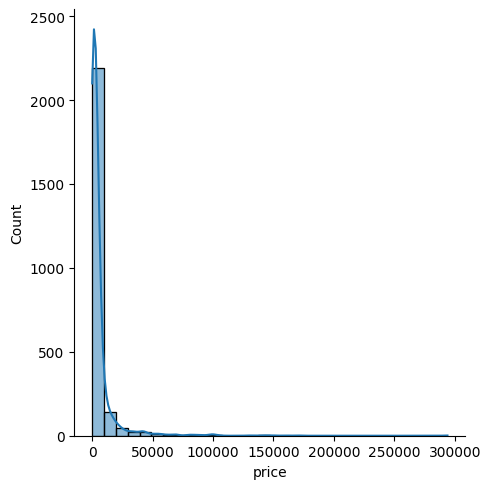

In [47]:
sns.displot(df_transformed['price'], bins=30, kde=True)

### Check Variable correlation

<Axes: xlabel='area', ylabel='price'>

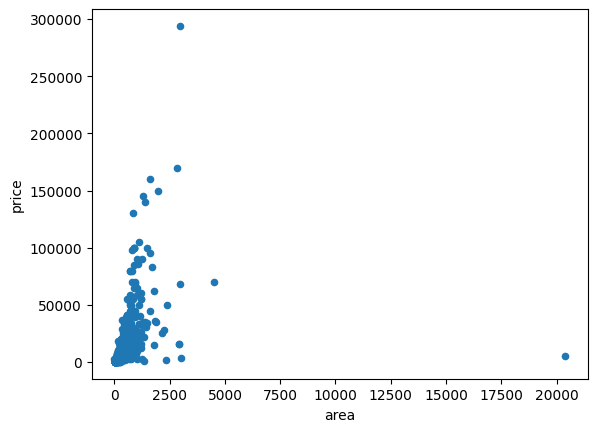

In [49]:
data = pd.concat([df_transformed['price'], df_transformed['area']], axis=1)
data.plot.scatter(x='area', y='price')

### Handling Outlier

In [ ]:
# area > 20000
df_transformed[df_transformed['area'] > 20000]

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
164,Jakarta Selatan,"Pasar Minggu, Rumah Siap Huni Di Dalam Komplek...",5500.0,"Pasar Minggu, Jakarta Selatan",20400.0,25000.0,4.0,2.0,2.0


In [52]:
# price > 200000
df_transformed[df_transformed['price'] > 200000]

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
730,Jakarta Pusat,"Turun Harga Kavling Jl Teuku Umar, Menteng, Pa...",294000.0,"Menteng, Jakarta Pusat",2975.0,1724.0,5.0,5.0,15.0
